In [371]:
import pandas as pd

spotify = pd.read_csv('../data/Spotify dataset export 2025-02-10 09-00-03.csv')

In [372]:
spotify.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952,1788577,55229,True,True,434663559,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958,6197318,155930,True,True,617259738,9.942693,Youtube


In [373]:
#Top 100 songs by streams
spotify.sort_values('Stream', ascending=False)['Track'].head(100)


15166                                  Blinding Lights
12385                                     Shape of You
19082                                Someone You Loved
17847                       rockstar (feat. 21 Savage)
17356    Sunflower - Spider-Man: Into the Spider-Verse
                             ...                      
17131                                        Moonlight
569                            Wonderwall - Remastered
19132                                          The Box
13971                               That's What I Like
124                                    Till I Collapse
Name: Track, Length: 100, dtype: object

In [374]:
#remove the youtube most_playedon
spotify = spotify[spotify['most_playedon'] != 'Youtube']

In [375]:
#Scaling the data to make it easier to work with
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_columns = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 
				  'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_min', 
				  'Views', 'Likes', 'Comments', 'Stream', 'EnergyLiveness']
spotify_scaled = scaler.fit_transform(spotify[numeric_columns])
spotify_scaled = pd.DataFrame(spotify_scaled, columns=numeric_columns)

spotify_scaled.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
0,1.222121,0.352300,0.256668,0.753883,-0.962619,-0.304326,2.619042,1.020040,0.611182,0.020863,5.234292,5.264031,1.747964,3.707724,-0.967108
1,0.378183,0.343279,0.432277,-0.599893,-0.695768,-0.312164,-0.888625,1.342527,-0.932462,-0.145793,0.213468,0.619290,0.194614,0.703045,2.475356
2,0.491105,1.335540,0.815406,-0.397011,-0.846623,-0.091722,-0.457208,0.129168,-0.418352,-0.034696,-0.300103,-0.100655,-0.069347,-0.313479,0.702625
3,0.455445,0.505649,0.433293,-0.638625,-0.990972,2.112547,-0.779069,0.238008,-0.000101,0.104143,1.342314,1.260161,0.465531,1.215710,1.583259
4,0.877414,1.191211,0.424757,-0.535340,-0.913217,0.099082,0.669306,1.802071,-0.005460,0.186725,1.724130,1.310821,0.653169,0.759697,-0.515787


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Distribution of predictors with outliers')

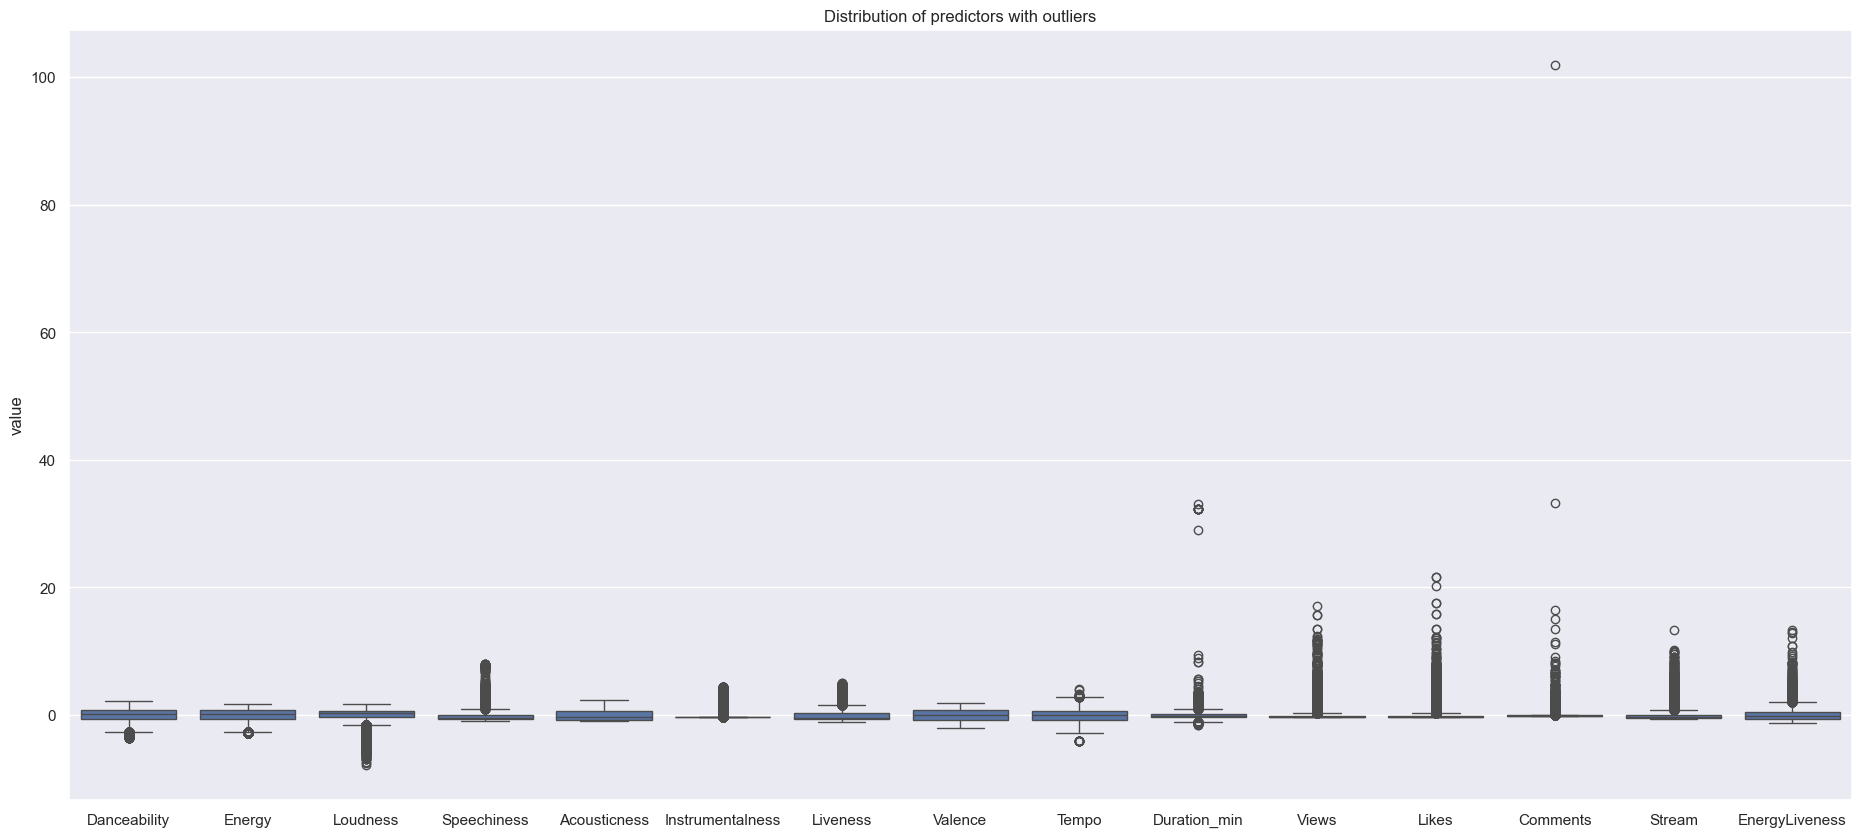

In [376]:
import seaborn as sns
import matplotlib.pyplot as plt
#box plot with outliers
df_melt=pd.melt(spotify_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt)
plt.xlabel(None)
plt.title('Distribution of predictors with outliers')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Distribution of predictors without outliers')

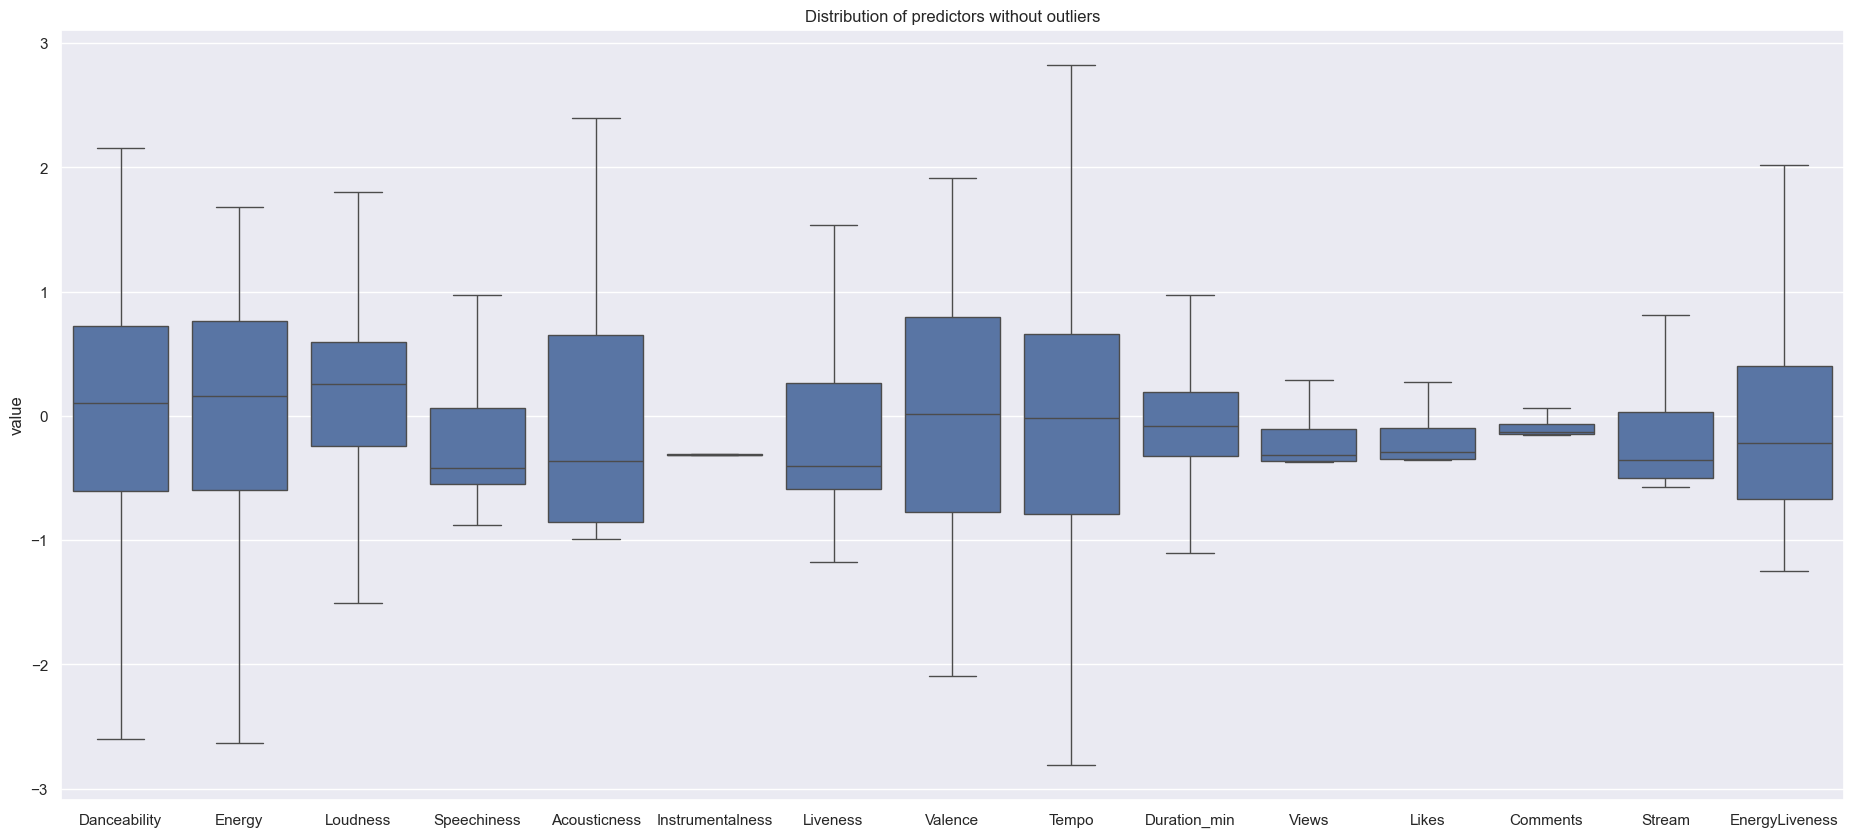

In [377]:
#boxplot without outliers
df_melt=pd.melt(spotify_scaled)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

In [378]:

df_clean=spotify_scaled.copy()
for col in df_clean.columns:
  q1=df_clean[col].quantile(0.25)
  q3=df_clean[col].quantile(0.75)
  inq=q3-q1
  filter=(df_clean[col] >= q1-1.5*inq) & (df_clean[col] <= q3+1.5*inq)
  df_clean[col] = df_clean[col].loc[filter]

In [379]:
#number of outliers for each predictor
df_clean.isna().sum()

Danceability         221
Energy               253
Loudness            1013
Speechiness         2033
Acousticness           0
Instrumentalness    3386
Liveness            1104
Valence                0
Tempo                 55
Duration_min         618
Views               2100
Likes               2014
Comments            2070
Stream              1684
EnergyLiveness       589
dtype: int64

Removing two predictors with a lot of outliers

In [380]:
#removing 2 predictors
df_clean = df_clean.drop(axis=1, labels=['Speechiness', 'Instrumentalness','Stream','Views','Likes','Comments'])

In [381]:
df_remove = df_clean.dropna()
df_remove.shape

(12573, 9)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


Text(0.5, 1.0, 'Distribution of predictors without outliers')

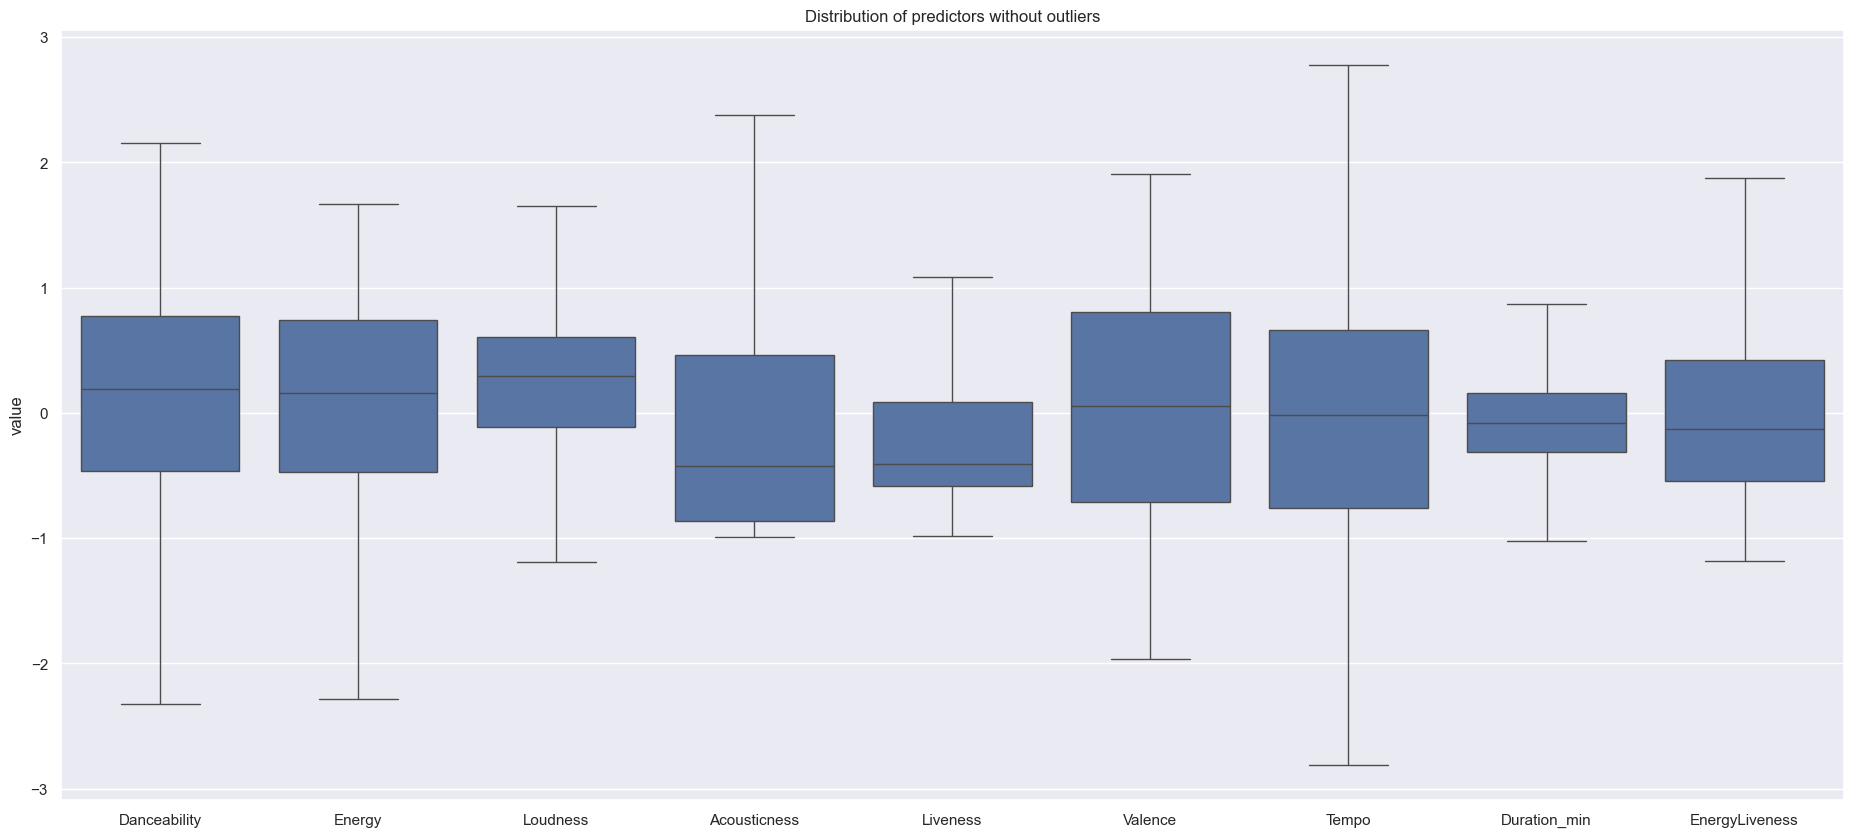

In [382]:
#box plot after removing the outliers
df_melt=pd.melt(df_remove)
df_melt
sns.set(rc={'figure.figsize':(23,10)})
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
plt.xlabel(None)
plt.title('Distribution of predictors without outliers')

Creating a unscaled dataframe


In [383]:
df_merge = spotify.iloc[df_remove.index]
df_merge = df_merge.drop(axis=1, labels=['Speechiness', 'Instrumentalness','Views','Likes','Comments'])
df_merge.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Acousticness', 'Liveness', 'Valence', 'Tempo',
       'Duration_min', 'Title', 'Channel', 'Licensed', 'official_video',
       'Stream', 'EnergyLiveness', 'most_playedon'],
      dtype='object')

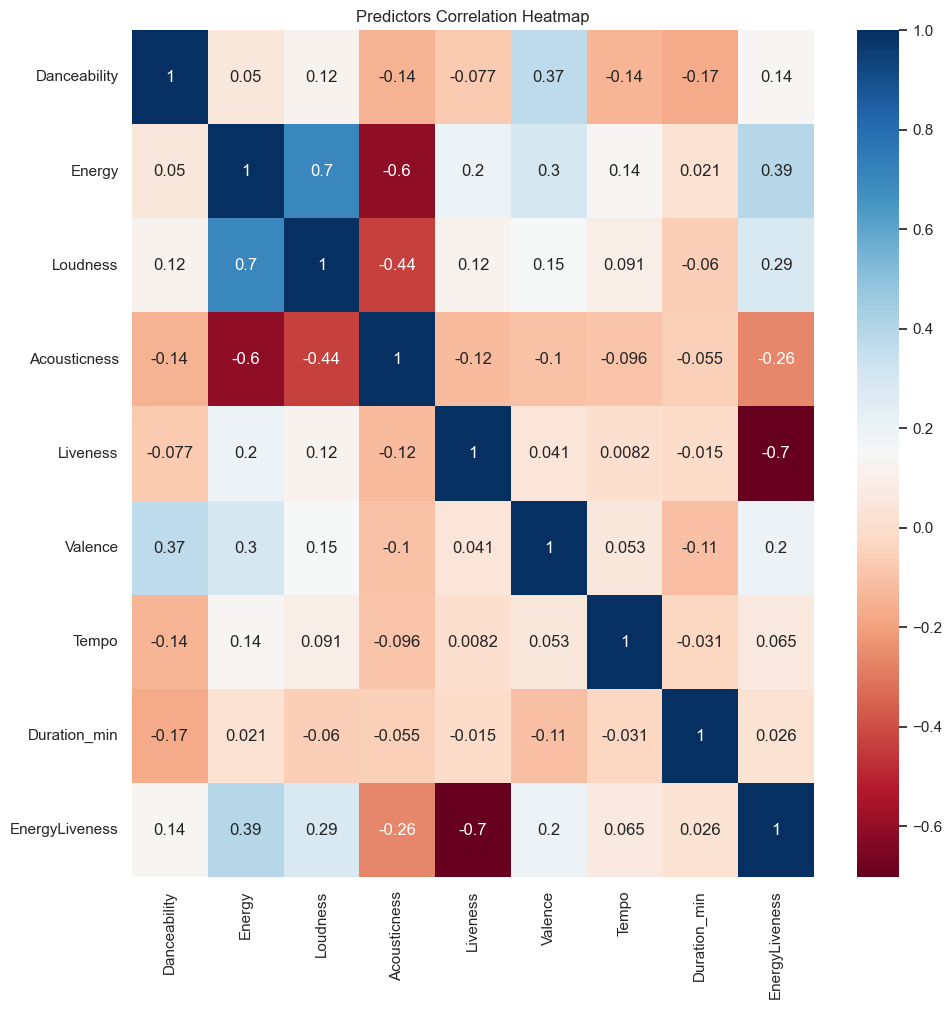

In [384]:
fig, ax = plt.subplots(figsize=(11,11)) 
ax = sns.heatmap(df_remove.corr(), annot=True, cmap='RdBu').set(title='Predictors Correlation Heatmap')

One hot encoding


In [385]:
df_categorical = spotify.drop(numeric_columns, axis=1)
cat_col = df_categorical.columns
cat_col = cat_col.drop(['Track', 'Album', 'most_playedon', 'Channel', 'Title'])

In [386]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

# 1. Variables binaires à encoder avec LabelEncoder
binary_cols = ['Licensed', 'official_video']
# 2. Variables catégorielles avec peu de catégories
label_cols = ['most_playedon', 'Channel', 'Album_type']
# 3. Variables catégorielles avec beaucoup de catégories
target_cols = ['Artist', 'Track', 'Album', 'Title']

# Encodage des variables binaires
label_encoders = {}
for col in binary_cols + label_cols:
    le = LabelEncoder()
    df_merge[f'{col}_encoded'] = le.fit_transform(df_merge[col])
    label_encoders[col] = le

# Encodage des variables avec beaucoup de catégories using TargetEncoder
te = TargetEncoder()
df_merge_encoded = te.fit_transform(df_merge[target_cols], df_merge['Stream'])
df_merge_encoded.columns = [f'{col}_encoded' for col in target_cols]

# Variables numériques à conserver
numeric_cols = ['Danceability', 'Energy', 'Loudness', 'Acousticness', 
                'Liveness', 'Valence', 'Tempo', 'Duration_min', 'EnergyLiveness']

# Combiner toutes les colonnes
df_merge_final = pd.concat([
    df_merge[numeric_cols],  # Variables numériques
    df_merge[[f'{col}_encoded' for col in binary_cols + label_cols]],  # Variables encodées avec LabelEncoder
    df_merge_encoded  # Variables encodées avec TargetEncoder
], axis=1)

# Ajouter la variable cible
df_merge_final['Stream'] = df_merge['Stream']

# Afficher les résultats
print(f"Nombre de features après encodage: {df_merge_final.shape[1]}")
print("\nColonnes du DataFrame final:")
print(df_merge_final.columns.tolist())
print("\nAperçu des premières lignes:")
df_merge_final.head()

Nombre de features après encodage: 19

Colonnes du DataFrame final:
['Danceability', 'Energy', 'Loudness', 'Acousticness', 'Liveness', 'Valence', 'Tempo', 'Duration_min', 'EnergyLiveness', 'Licensed_encoded', 'official_video_encoded', 'most_playedon_encoded', 'Channel_encoded', 'Album_type_encoded', 'Artist_encoded', 'Track_encoded', 'Album_encoded', 'Title_encoded', 'Stream']

Aperçu des premières lignes:


,Danceability,Energy,Loudness,Acousticness,Liveness,Valence,Tempo,Duration_min,EnergyLiveness,Licensed_encoded,official_video_encoded,most_playedon_encoded,Channel_encoded,Album_type_encoded,Artist_encoded,Track_encoded,Album_encoded,Title_encoded,Stream
2,0.695,0.923,-3.930,0.042500,0.116,0.551,108.014,3.585833,7.956897,1,1,0,1475,2,1.542074e+08,1.374244e+08,1.374244e+08,1.374244e+08,63063467
3,0.689,0.739,-5.810,0.000015,0.064,0.578,120.423,3.897783,11.546875,1,1,0,1475,0,1.542074e+08,1.867903e+08,1.867903e+08,1.867903e+08,434663559
5,0.760,0.891,-5.852,0.022900,0.298,0.966,120.264,4.083333,2.989933,1,1,0,1475,0,1.542074e+08,1.723725e+08,1.723725e+08,1.723725e+08,323850327
6,0.716,0.897,-7.185,0.012000,0.325,0.358,127.030,4.569033,2.760000,0,1,0,1039,2,1.542074e+08,1.299918e+08,1.299918e+08,1.299918e+08,10666154
7,0.726,0.815,-5.886,0.007990,0.112,0.462,140.158,3.492667,7.276786,0,0,0,3414,0,1.542074e+08,1.510029e+08,1.510029e+08,1.510029e+08,159605929


In [ ]:
df_merge_final.drop(cat_col, axis=1, inplace=True)

In [ ]:
df_merge_final.drop(['Track', 'Album', 'Title','Channel','most_playedon'], axis=1, inplace=True)

In [388]:
df_merge_final.head()

,Danceability,Energy,Loudness,Acousticness,Liveness,Valence,Tempo,Duration_min,EnergyLiveness,Licensed_encoded,official_video_encoded,most_playedon_encoded,Channel_encoded,Album_type_encoded,Artist_encoded,Track_encoded,Album_encoded,Title_encoded,Stream
2,0.695,0.923,-3.930,0.042500,0.116,0.551,108.014,3.585833,7.956897,1,1,0,1475,2,1.542074e+08,1.374244e+08,1.374244e+08,1.374244e+08,63063467
3,0.689,0.739,-5.810,0.000015,0.064,0.578,120.423,3.897783,11.546875,1,1,0,1475,0,1.542074e+08,1.867903e+08,1.867903e+08,1.867903e+08,434663559
5,0.760,0.891,-5.852,0.022900,0.298,0.966,120.264,4.083333,2.989933,1,1,0,1475,0,1.542074e+08,1.723725e+08,1.723725e+08,1.723725e+08,323850327
6,0.716,0.897,-7.185,0.012000,0.325,0.358,127.030,4.569033,2.760000,0,1,0,1039,2,1.542074e+08,1.299918e+08,1.299918e+08,1.299918e+08,10666154
7,0.726,0.815,-5.886,0.007990,0.112,0.462,140.158,3.492667,7.276786,0,0,0,3414,0,1.542074e+08,1.510029e+08,1.510029e+08,1.510029e+08,159605929


### Model creation

In [390]:
X = df_merge_final.drop('Stream', axis=1)
y = df_merge_final['Stream']

In [391]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)

In [392]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np
from catboost import CatBoostRegressor

In [393]:
#Fold cross validation for choosing the top models
models = {
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR(),
    'CatBoost': CatBoostRegressor(verbose=0),}

mean_df = []
for name, model in models.items():
    mean_arr = {}
    cv_results = cross_val_score(model, X_train, y_train, cv=3)
    print(name, cv_results)
    mean = np.mean(cv_results)
    mean_arr['name'] = name
    mean_arr['result'] = mean
    mean_df.append(mean_arr)

Random Forest [0.98699697 0.99195972 0.99235382]
SVM [-0.12513875 -0.12114709 -0.13452283]
CatBoost [0.97414459 0.99133973 0.98560817]


In [394]:

Data = pd.DataFrame(mean_df)
Data.sort_values('result', ascending=False)
     

,name,result
0,Random Forest,0.990437
2,CatBoost,0.983697
1,SVM,-0.126936


=== Résultats des modèles ===

Random Forest:
R² Score: 0.9949
RMSE: 18093843.2817
MAE: 4863865.2262

XGBoost:
R² Score: 0.9939
RMSE: 19760625.9615
MAE: 5223188.7617


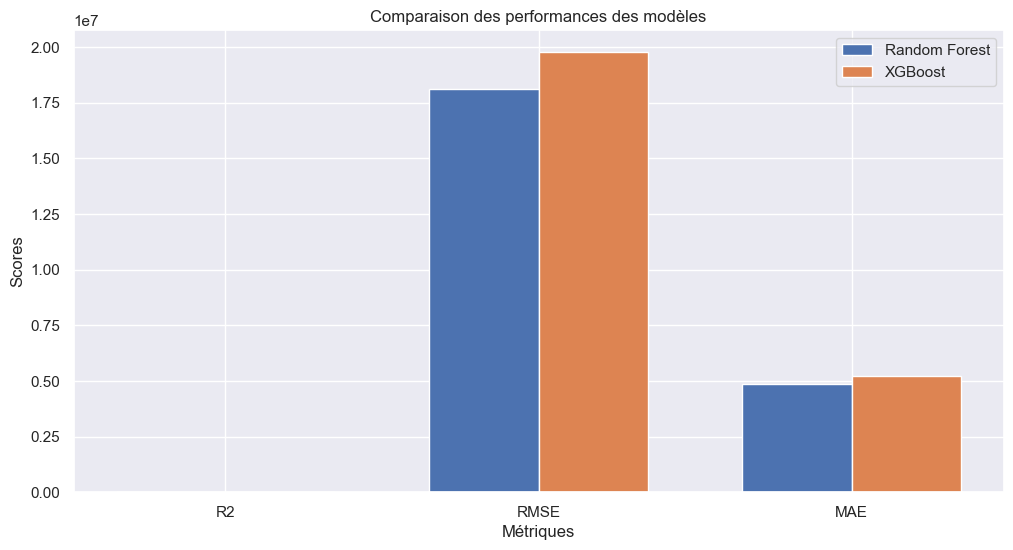

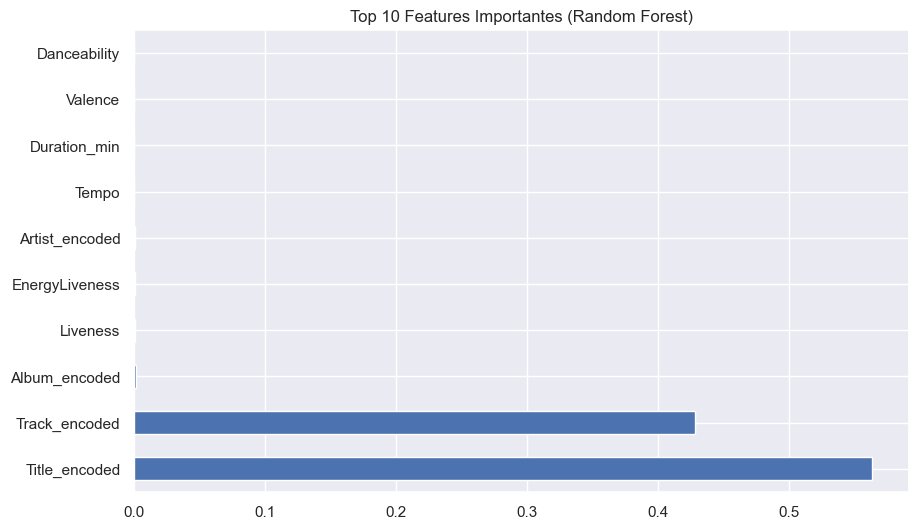

In [397]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Préparation des données
# Transformation logarithmique de la variable cible
df_merge_final['Stream_log'] = np.log1p(df_merge_final['Stream'])

# Division des données
X = df_merge_final.drop(['Stream', 'Stream_log'], axis=1)
y = df_merge_final['Stream_log']

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Configuration des modèles
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBRegressor(
        n_estimators=100,
        max_depth=8,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
}

# 3. Entraînement et évaluation
results = {}

for name, model in models.items():
    # Entraînement
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)
    y_true = np.expm1(y_test)
    
    # Métriques
    results[name] = {
        'R2': r2_score(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAE': mean_absolute_error(y_true, y_pred)
    }

# 4. Affichage des résultats
print("=== Résultats des modèles ===")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"R² Score: {metrics['R2']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")

# 5. Visualisation
plt.figure(figsize=(12, 6))
metrics = ['R2', 'RMSE', 'MAE']
x = np.arange(len(metrics))
width = 0.35

for i, (model_name, model_results) in enumerate(results.items()):
    values = [model_results[metric] for metric in metrics]
    plt.bar(x + i*width, values, width, label=model_name)

plt.xlabel('Métriques')
plt.ylabel('Scores')
plt.title('Comparaison des performances des modèles')
plt.xticks(x + width/2, metrics)
plt.legend()
plt.show()

# 6. Feature Importance pour le meilleur modèle
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]

if isinstance(best_model, RandomForestRegressor):
    importances = pd.Series(best_model.feature_importances_, index=X.columns)
else:
    importances = pd.Series(best_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
importances.nlargest(10).plot(kind='barh')
plt.title(f'Top 10 Features Importantes ({best_model_name})')
plt.show()

,Danceability,Energy,Loudness,Acousticness,Liveness,Valence,Tempo,Duration_min,EnergyLiveness,Licensed_encoded,official_video_encoded,most_playedon_encoded,Channel_encoded,Album_type_encoded,Artist_encoded,Track_encoded,Album_encoded,Title_encoded
2,0.695,0.923,-3.930,0.042500,0.1160,0.5510,108.014,3.585833,7.956897,1,1,0,1475,2,1.542074e+08,1.374244e+08,1.374244e+08,1.374244e+08
3,0.689,0.739,-5.810,0.000015,0.0640,0.5780,120.423,3.897783,11.546875,1,1,0,1475,0,1.542074e+08,1.867903e+08,1.867903e+08,1.867903e+08
5,0.760,0.891,-5.852,0.022900,0.2980,0.9660,120.264,4.083333,2.989933,1,1,0,1475,0,1.542074e+08,1.723725e+08,1.723725e+08,1.723725e+08
6,0.716,0.897,-7.185,0.012000,0.3250,0.3580,127.030,4.569033,2.760000,0,1,0,1039,2,1.542074e+08,1.299918e+08,1.299918e+08,1.299918e+08
7,0.726,0.815,-5.886,0.007990,0.1120,0.4620,140.158,3.492667,7.276786,0,0,0,3414,0,1.542074e+08,1.510029e+08,1.510029e+08,1.510029e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20589,0.582,0.926,-6.344,0.448000,0.0839,0.6580,90.002,1.577783,11.036949,1,1,0,3385,2,1.124328e+08,1.314374e+08,1.314374e+08,1.314374e+08
20590,0.531,0.936,-1.786,0.028000,0.0923,0.6570,174.869,2.514283,10.140845,1,1,0,3385,2,1.124328e+08,1.316548e+08,1.316548e+08,1.316548e+08
20591,0.443,0.830,-4.679,0.024300,0.1540,0.4190,168.388,2.280700,5.389610,1,1,0,3385,2,1.124328e+08,1.310469e+08,1.310469e+08,1.310469e+08
20592,0.417,0.767,-4.004,0.356000,0.1080,0.5390,155.378,1.806450,7.101852,1,1,0,3385,2,1.124328e+08,1.311312e+08,1.311312e+08,1.311312e+08


Text(0.5, 0, 'Feature Importance')

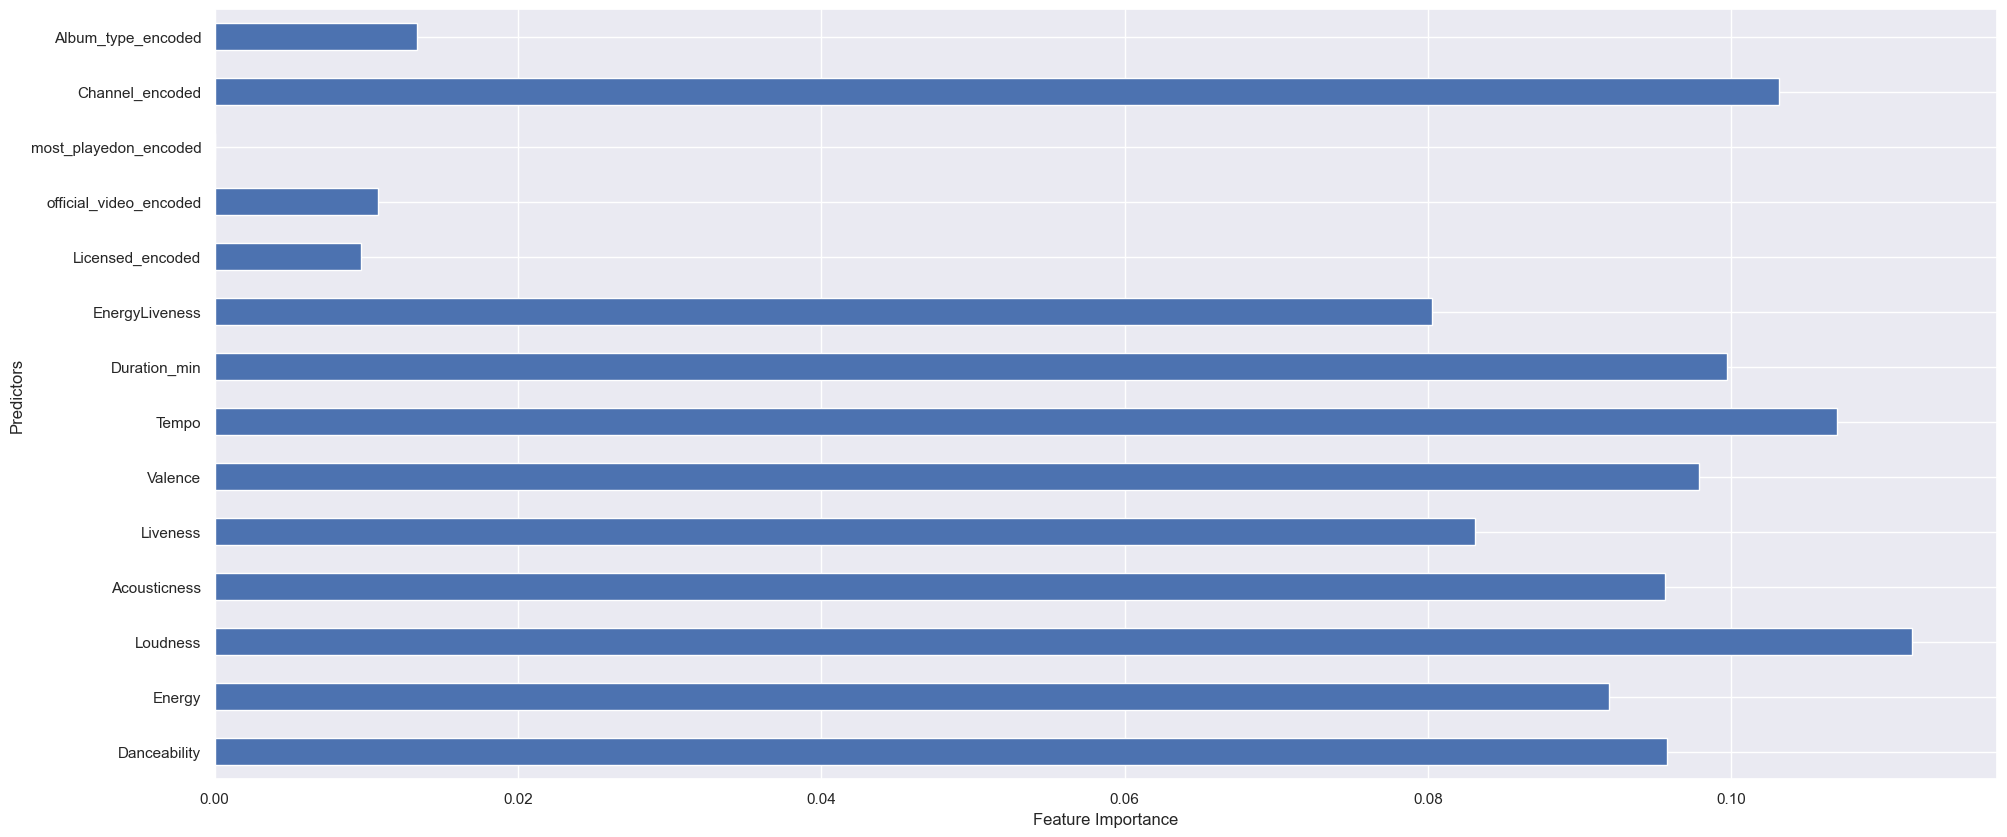

In [369]:
#plotting feature importance
feat_importances_plot = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances_plot.plot(kind='barh')
plt.ylabel("Predictors")
plt.xlabel("Feature Importance")

ACP (not useful but fun)

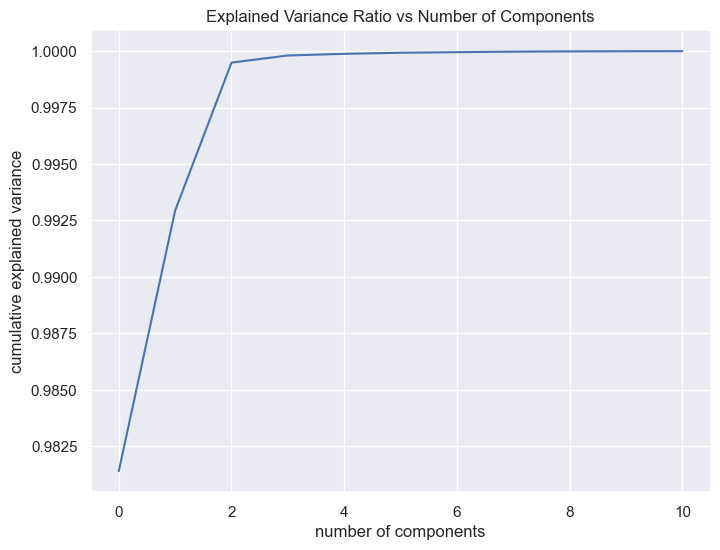

None

In [246]:
from sklearn.decomposition import PCA

# Get the minimum number between samples and features
n_components = min(X_train.shape[0], X_train.shape[1])

pca_test = PCA(n_components=n_components)
pca_test.fit(X_train)
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(8,6)})

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
display(plt.show())

In [398]:

pca = PCA(n_components=4)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
cross_val_score(RandomForestRegressor(),X_train_pca, y_train,cv=5).mean()

0.7179657385741223